In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# MURA

In [2]:
import sys
sys.path.append("../../fastai/")

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn.metrics import confusion_matrix

In [4]:
PATH = "/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/"  #MMIV
#PATH = "/Users/Sathiesh/MachineLearning/Deep_Learning_Kaliy/my_projects/mura/data/" #Home

In [5]:
os.listdir(PATH)

['test_submission_example.csv',
 'models',
 'tmp',
 'MURA-v1.0',
 'valid.csv',
 'test',
 'cleaned_label.csv',
 'train.csv']

In [6]:
df_train = pd.read_csv(f'{PATH}train.csv')
df_valid = pd.read_csv(f'{PATH}valid.csv')

In [7]:
df_train.head()

,MURA-v1.0/train/XR_SHOULDER/patient00001/study1_positive/image1.png,1
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [8]:
df_train.columns = ['Image Index', 'Abnormality']

In [9]:
df_valid.columns = ['Image Index', 'Abnormality']

In [10]:
df_train.shape, df_valid.shape

((37110, 2), (3224, 2))

In [11]:
df = pd.concat([df_train, df_valid], ignore_index=True)
df.head()

,Image Index,Abnormality
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [12]:
df.shape

(40334, 2)

In [13]:
df['Abnormality'] = df['Abnormality'].astype('bool')

In [14]:
val_idxs = np.array(range(len(df_train), len(df)))

In [15]:
cleaned_label_path = f'{PATH}cleaned_label.csv'
df.to_csv(cleaned_label_path, index=False)

# View data

In [16]:
sz = 112
arch = dn169
bs = 16

In [17]:
def get_data(sz): 
    tfms = tfms_from_model(arch, sz, aug_tfms=RandomFlip())  #transforms_side_on
    return ImageClassifierData.from_csv(PATH ,'', cleaned_label_path , test_name='test',
                                       val_idxs=val_idxs, tfms=tfms, bs=bs);

In [18]:
data = get_data(sz)

In [19]:
fn = PATH+data.trn_ds.fnames[10]
fn 

'/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/MURA-v1.0/train/XR_ELBOW/patient00032/study1_negative/image2.png'

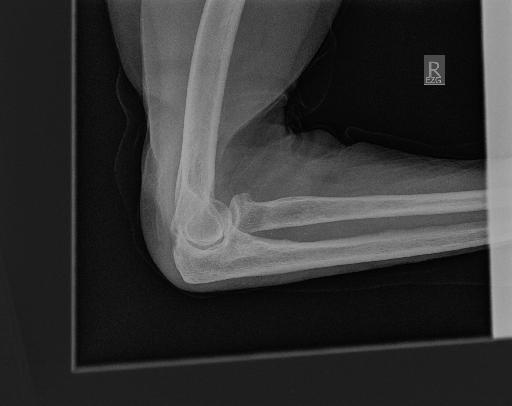

In [20]:
img = PIL.Image.open(fn);
img

In [21]:
data.trn_ds.fnames.shape ,data.val_ds.fnames.shape

((37110,), (3224,))

# Training

In [22]:
learn = ConvLearner.pretrained(arch, data, ps = 0.5, opt_fn=optim.Adam) 

 64%|██████▍   | 1493/2320 [01:03<00:35, 23.38it/s, loss=2.57] 

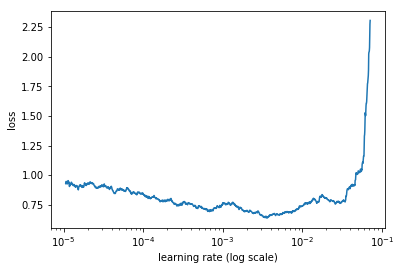

In [23]:
learn.lr_find()
learn.sched.plot()

In [25]:
lr = 0.00006

In [26]:
learn.fit(lr,3, cycle_len=1, cycle_mult =2) 

  9%|▊         | 202/2320 [00:08<01:33, 22.67it/s, loss=0.926]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.726866   0.585392   0.688586  
    1      0.657744   0.559925   0.719913                      
    2      0.655315   0.56361    0.725496                      
    3      0.619664   0.548664   0.726427                      
    4      0.58437    0.558297   0.716501                      
    5      0.587752   0.546904   0.730149                      
    6      0.581133   0.545426   0.730769                      



[array([0.54543]), 0.7307692307692307]

 65%|██████▍   | 1498/2320 [01:03<00:34, 23.73it/s, loss=2.26] 

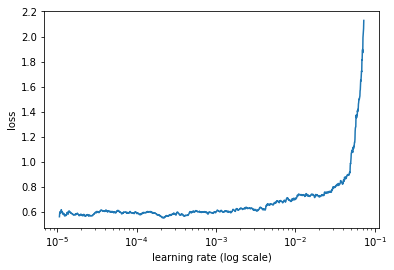

 65%|██████▍   | 1498/2320 [01:20<00:43, 18.72it/s, loss=2.26]

In [27]:
learn.lr_find()
learn.sched.plot()

In [28]:
lrs = [1e-5, 1e-4, 1e-3]
learn.unfreeze()

In [29]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  4%|▎         | 83/2320 [00:08<03:51,  9.68it/s, loss=0.635] 


Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.474726   0.502345   0.770471  
    1      0.493361   0.477301   0.783189                      
    2      0.452086   0.453433   0.796836                      
    3      0.487552   0.467174   0.793734                      
    4      0.45216    0.444623   0.80366                       
    5      0.390303   0.453462   0.801799                      
    6      0.380678   0.455485   0.810794                      



[array([0.45549]), 0.8107940446650124]

In [30]:
learn.save(f'{sz}')

In [31]:
sz = 224

In [32]:
learn.set_data(get_data(sz))
learn.freeze()

In [33]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.483775   0.507447   0.764888  
    1      0.4949     0.478756   0.781638                      
    2      0.477472   0.480896   0.782878                      
    3      0.460972   0.470247   0.786911                      
    4      0.432231   0.475768   0.784739                      
    5      0.463305   0.473429   0.787531                      
    6      0.457268   0.46426    0.788151                      



[array([0.46426]), 0.788151364764268]

In [34]:
learn.unfreeze();
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.436742   0.422028   0.809553  
    1      0.424692   0.440575   0.808313                      
    2      0.390111   0.405608   0.828164                      
    3      0.415887   0.415903   0.822891                      
    4      0.373197   0.423024   0.813586                      
    5      0.339331   0.41849    0.823201                      
    6      0.294181   0.429405   0.823821                      



[array([0.4294]), 0.8238213399503722]

In [35]:
learn.save(f'{sz}')

In [36]:
sz = 299

In [37]:
learn.set_data(get_data(sz))
learn.freeze() 

In [38]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.375443   0.42638    0.815757  
    1      0.380504   0.421823   0.816687                      
    2      0.364217   0.425054   0.816377                      
    3      0.372177   0.414594   0.820099                      
    4      0.353879   0.411145   0.82165                       
    5      0.345578   0.414124   0.819479                      
    6      0.397033   0.421337   0.818238                      



[array([0.42134]), 0.8182382133995038]

In [39]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
#Hvis ikke overfitting her: 
learn.save(f'{sz}')

epoch      trn_loss   val_loss   accuracy                      
    0      0.394719   0.406308   0.829094  
    1      0.360808   0.415623   0.831266                      
    2      0.314878   0.418063   0.829404                      
    3      0.346921   0.451096   0.814516                      
    4      0.329832   0.445283   0.815447                      
    5      0.252108   0.452899   0.819479                      
    6      0.220716   0.493245   0.819169                      



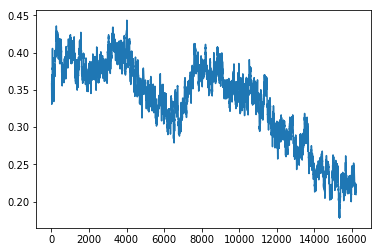

In [40]:
learn.sched.plot_loss()

# Transfer learning 

In [41]:
sz = 112

In [42]:
data = get_data(sz)

In [43]:
learnTL = ConvLearner.pretrained(arch, data, opt_fn=optim.Adam, ps = 0.5) 

In [44]:
learnTL.load('256169denne') #pretrained weights on chestX 14 dataset 

 65%|██████▍   | 1507/2320 [01:03<00:34, 23.74it/s, loss=2.44] 

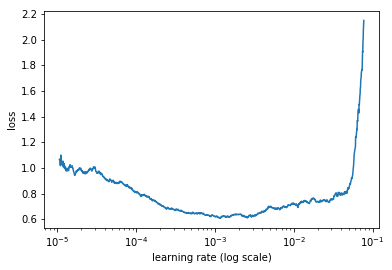

In [45]:
learnTL.lr_find()
learnTL.sched.plot()

In [46]:
lr = 0.0001

In [47]:
learnTL.fit(lr,3, cycle_len=1, cycle_mult =2) 

  6%|▌         | 135/2320 [00:06<01:38, 22.17it/s, loss=0.967]

Exception in thread Thread-53:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.630048   0.62196    0.656948  
    1      0.588719   0.583635   0.692308                      
    2      0.565951   0.576787   0.698511                      
    3      0.561742   0.56078    0.7134                        
    4      0.556323   0.557396   0.716811                      
    5      0.559034   0.549762   0.721774                      
    6      0.539062   0.549291   0.717742                      



[array([0.54929]), 0.717741935483871]

 65%|██████▍   | 1497/2320 [01:03<00:34, 23.64it/s, loss=2.15] 

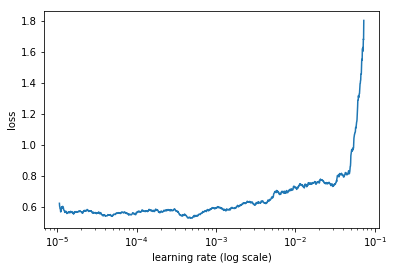

In [48]:
learnTL.lr_find()
learnTL.sched.plot()

In [49]:
lrs = [1e-6,1e-5,1e-4]
learnTL.unfreeze()

In [50]:
learnTL.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  3%|▎         | 61/2320 [00:06<03:53,  9.68it/s, loss=0.599]

Exception in thread Thread-61:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.554578   0.542681   0.726117  
    1      0.535285   0.512949   0.75                          
    2      0.532703   0.503147   0.761787                      
    3      0.497217   0.499499   0.759305                      
    4      0.491467   0.493279   0.771092                      
    5      0.438068   0.483899   0.777605                      
    6      0.450813   0.476777   0.784429                      



[array([0.47678]), 0.7844292803970223]

In [51]:
learnTL.save(f'{sz}TL')

In [52]:
sz = 224

In [53]:
learnTL.set_data(get_data(sz))
learnTL.freeze()

In [54]:
learnTL.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.502638   0.521358   0.754342  
    1      0.508399   0.504267   0.765819                      
    2      0.531917   0.517874   0.753102                      
    3      0.506929   0.498128   0.769231                      
    4      0.484181   0.499635   0.769851                      
    5      0.520646   0.498728   0.76861                       
    6      0.492961   0.487548   0.775124                      



[array([0.48755]), 0.7751240694789082]

In [55]:
learnTL.unfreeze()
learnTL.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.468062   0.463035   0.795596  
    1      0.485486   0.450183   0.795285                      
    2      0.424178   0.440074   0.80304                       
    3      0.452074   0.44645    0.800868                      
    4      0.445241   0.435601   0.806452                      
    5      0.408598   0.436981   0.810794                      
    6      0.393671   0.432914   0.813586                      



[array([0.43291]), 0.8135856079404467]

In [56]:
learnTL.save(f'{sz}TL')

In [57]:
sz = 299

In [58]:
learnTL.set_data(get_data(sz))
learnTL.freeze()

In [59]:
learnTL.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.411413   0.437977   0.810174  
    1      0.402986   0.428464   0.814516                      
    2      0.418871   0.428428   0.812965                      
    3      0.400245   0.434496   0.813896                      
    4      0.403013   0.428465   0.812345                      
    5      0.416431   0.436289   0.808933                      
    6      0.427618   0.425842   0.812035                      



[array([0.42584]), 0.8120347394540943]

In [60]:
learnTL.save(f'{sz}TL')

In [61]:
learnTL.unfreeze()
learnTL.fit(lrs,3, cycle_len=1, cycle_mult=2)
#learnTL.save(f'{sz}TL') hvis den ikke overfitter

epoch      trn_loss   val_loss   accuracy                      
    0      0.415487   0.429165   0.808313  
    1      0.418831   0.418127   0.810484                      
    2      0.395641   0.421912   0.816998                      
    3      0.415026   0.42336    0.815757                      
    4      0.359712   0.424388   0.82103                       
    5      0.331228   0.431861   0.820409                      
    6      0.329263   0.441285   0.820409                      



[array([0.44129]), 0.8204094292803971]

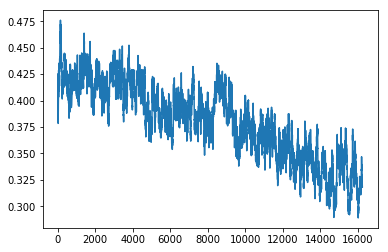

In [62]:
learnTL.sched.plot_loss()

# Prediction on test set

In [ ]:
test_list = data.test_ds.fnames
len(test_list)

In [ ]:
#fjerne imagex.png fra stringen, så man kan finne alle bildene for et studie
def searching_string(pasient_image_path):
    string_size = len(pasient_image_path) - len('_image1.png')
    return pasient_image_path[:string_size] 

In [ ]:
#finne indeksene til bildene som er med i studiet
def find_img_indxs(pasient_study): 
    return [test_list.index(i) for i in test_list if pasient_study in i]

In [ ]:
trn_tfms, val_tfms = tfms_from_model(arch, sz) # get transformations
def predict_abnormality(fn): 
    im = open_image(fn)
    im_val = val_tfms(im)
    preds = learnTL.predict_array(im_val[None])
    return np.argmax(preds)

you should use the 2nd return val from tfms_from_model. The first one includes data augmentation, e.g. for the training set. For predictions you don’t want that, so use the 2nd one.
Jeremy

In [ ]:
#fjerne indeksene til bildene fra test_list når man er ferdig med å predikere et studie. 
def del_indxs(study_img_indxs):
    #for i in study_img_indxs: 
       # del test_list[i] 
    return np.delete(test_list, study_img_indxs).tolist()

In [ ]:
predictions_dict = {}

while(len(test_list)>0): 
    string_study = searching_string(test_list[0])
    study_img_indxs = find_img_indxs(string_study)
    
    prediction_list = [] #skal inneholde alle predikasjonene for et studie

    #Her skal det predikeres på hvert av bildene i studiet
    for i in study_img_indxs: 
        prediction = predict_abnormality(PATH+test_list[i])
        prediction_list.append(prediction)
        
    predictions_dict[string_study] = max(prediction_list) # nøkkel : navnet til studiet + value: predikasjonen (hvis en av de er True, så er studiet True)
    
    #ferdig med predikasjon for et studie
    test_list = del_indxs(study_img_indxs)
    #print(find_img_indxs(string_study)) #bare for å teste at alle listene som retuneres er tomme 

In [ ]:
len(predictions_dict)

In [ ]:
df_test = pd.read_csv(f'{PATH}test_submission_example.csv', header=None)

In [ ]:
df_test.shape

In [ ]:
df_test.columns = ['Study','Abnormality']

In [ ]:
df_test.head()

In [ ]:
y = []
preds = []

In [ ]:
def add_values(y_value, preds_value): 
    y.append(y_value)
    preds.append(preds_value)

In [ ]:
def test_accuracy(pred_dict, df_test): 
    num_correct = 0; 
    for key, value in pred_dict.items(): 
        searching_string = key.replace('_', '/')+'/' #for å matche verdiene i df
        row = df_test.loc[df_test['Study'] == searching_string]
        
        if(int(row.Abnormality.values) == value): 
            num_correct+=1
        
        add_values(int(row.Abnormality.values), value)
        
    return num_correct/len(pred_dict)

In [ ]:
test_accuracy(predictions_dict, df_test)

In [ ]:
cm = confusion_matrix(y,preds);

In [ ]:
plot_confusion_matrix(cm, "data.classes")